<div style="text-align: center;">
    <h1><b>CNN model for the classification clothes</b></h1>
</div>

<div style="text-align: center;">
    <h1><b>Importing libraries and loading data</b></h1>
</div>

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Load Fashion-MNIST data
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

<div style="text-align: center;">
    <h1><b>Data exploration</b></h1>
</div>

In [25]:
print(f'train images shape: {train_images.shape}')
print(f'train labels shape: {train_labels.shape}')
print(f'test images shape: {test_images.shape}')
print(f'test labels shape: {test_labels.shape}')
print(f'train images[0] shape: {train_images[0].shape}')

train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)
train images[0] shape: (28, 28)


<div style="text-align: center;">
    <h2><b>standardization</b></h2>
</div>

In [33]:
# Data normalization (rescaling pixel values to a range from 0 to 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definition of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<div style="text-align: center;">
    <h2><b>Ploting random images from train set</b></h2>
</div>

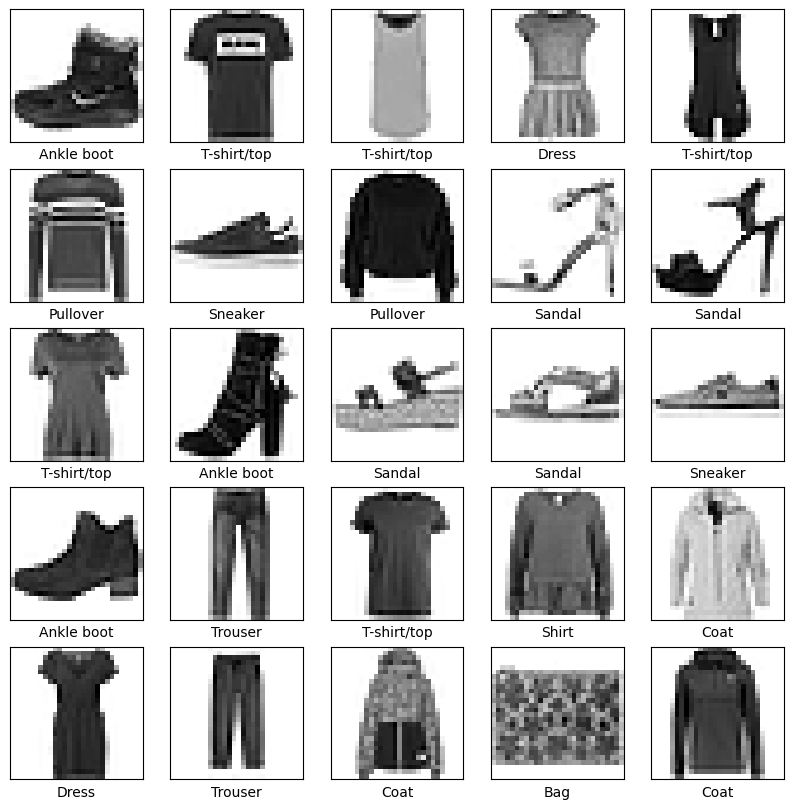

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [35]:
# Add a channel dimension for image data
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

<div style="text-align: center;">
    <h1><b>Model building</b></h1>
</div>

In [36]:
# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/lipton/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

<div style="text-align: center;">
    <h1><b>Model training</b></h1>
</div>

In [37]:
# Early stopping callback definition
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7437 - loss: 0.6856 - val_accuracy: 0.8695 - val_loss: 0.3585
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8810 - loss: 0.3300 - val_accuracy: 0.8851 - val_loss: 0.3134
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8971 - loss: 0.2774 - val_accuracy: 0.8914 - val_loss: 0.2964
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9105 - loss: 0.2417 - val_accuracy: 0.9004 - val_loss: 0.2744
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9208 - loss: 0.2131 - val_accuracy: 0.9019 - val_loss: 0.2720
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9292 - loss: 0.1937 - val_accuracy: 0.9117 - val_loss: 0.2519
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9329 - loss: 0.1741 - val_accuracy: 0.9090 - val_loss: 0.2615
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9410 - loss: 0

<div style="text-align: center;">
    <h2><b>ACC vs. VAL_ACC chart</b></h2>
    <h2><b>LOSS vs. VAL_LOSS chart</b></h2>
</div>

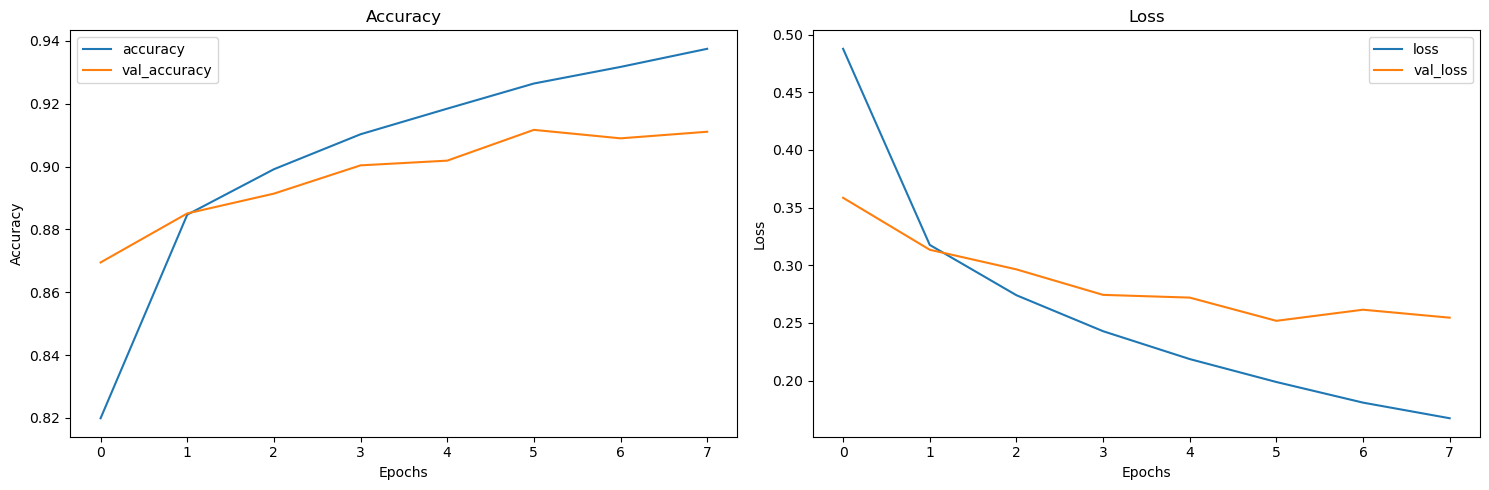

In [38]:
# Writing metrics to the DataFrame
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch


plt.figure(figsize=(15, 5))

# Accuracy chart
plt.subplot(1, 2, 1)
sns.lineplot(data=metrics, x='epoch', y='accuracy', label='accuracy')
sns.lineplot(data=metrics, x='epoch', y='val_accuracy', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss chart
plt.subplot(1, 2, 2)
sns.lineplot(data=metrics, x='epoch', y='loss', label='loss')
sns.lineplot(data=metrics, x='epoch', y='val_loss', label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## conclusions

- we should finish training the model at epoch 5
- Acc on the training set is approximately 0.92 and on the validation set 0.91 for epoch 5
- the loss on the training set is about 0.20 and on the validation set 0.25 for epoch 5

<div style="text-align: center;">
    <h2><b>model evaluation</b></h2>
</div>

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9110 - loss: 0.2600

Test accuracy: 0.9110999703407288
